In [1]:
import pandas as pd

# Loading Dataset

In [2]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    return df

In [3]:
movies_df = load_dataset('data/all_movies_combined.csv')
movies_df.head()

,index,utterance,movie_name,tag,count_utterances
0,0,I got here as fast as legally possible.,1917,friendship,1480
1,1,Do you have my will?,1917,friendship,1480
2,2,"Yes, sir.",1917,friendship,1480
3,3,I think we should take him to the hospital.,1917,friendship,1480
4,4,"No, George wants to stay at home.",1917,friendship,1480


In [25]:
annotations_word_embedding_fox_news_df = load_dataset('output/concat_movie_data_10epochs_fox.csv')
annotations_word_embedding_fox_news_df = annotations_word_embedding_fox_news_df.drop(columns=['Unnamed: 0.1', 'utterance', 'tag', 'count_utterances', 'sentence'])
annotations_word_embedding_fox_news_df['label'] = annotations_word_embedding_fox_news_df['label'].map({0: 'Non Hate-Speech', 1: 'Hate-Speech'})
annotations_word_embedding_fox_news_df.rename(columns={'label': 'label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df.head()

,index,movie_name,label_fox_news
0,0,1917,Hate-Speech
1,1,1917,Non Hate-Speech
2,2,1917,Non Hate-Speech
3,3,1917,Non Hate-Speech
4,4,1917,Non Hate-Speech


In [26]:
annotations_word_embedding_twitter_df = load_dataset('output/concat_movie_data_twitter_10epochs.csv')
annotations_word_embedding_twitter_df = annotations_word_embedding_twitter_df.drop(columns=['Unnamed: 0.1', 'utterance', 'tag', 'count_utterances', 'sentence'])
annotations_word_embedding_twitter_df['label'] = annotations_word_embedding_twitter_df['label'].map({0: 'Hate-Speech', 1: 'Offensive Language', 2:'Neither'})
annotations_word_embedding_twitter_df.rename(columns={'label': 'label_twitter'}, inplace=True)
annotations_word_embedding_twitter_df.head()

,index,movie_name,label_twitter
0,0,1917,Neither
1,1,1917,Neither
2,2,1917,Neither
3,3,1917,Neither
4,4,1917,Neither


annotations_word_embedding_fox_news_df# Joining Datasets

In [27]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_word_embedding_twitter_df, on=['index', 'movie_name'])

In [28]:
df_results.head()

,index,utterance,movie_name,tag,count_utterances,label_fox_news,label_twitter
0,0,I got here as fast as legally possible.,1917,friendship,1480,Hate-Speech,Neither
1,1,Do you have my will?,1917,friendship,1480,Non Hate-Speech,Neither
2,2,"Yes, sir.",1917,friendship,1480,Non Hate-Speech,Neither
3,3,I think we should take him to the hospital.,1917,friendship,1480,Non Hate-Speech,Neither
4,4,"No, George wants to stay at home.",1917,friendship,1480,Non Hate-Speech,Neither


## Analyse Results

In [29]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [30]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

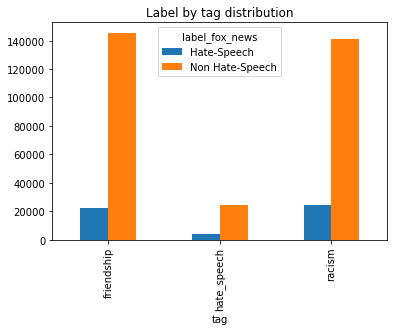

In [31]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_fox_news')

<AxesSubplot:title={'center':'Label by tag distribution (Percentage)'}, xlabel='tag'>

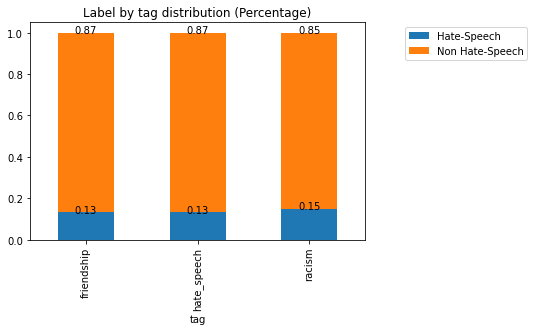

In [32]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_fox_news')

## hate speech examples

In [33]:
hatespeech_sentences = df_results[df_results.label_fox_news=='Hate-Speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

 I got here as fast as legally possible.
---
 That's me.
---
 Oh, and who is this handsome young man?
---
He was about, oh, this tall when last you saw him.
---
 It's in the car.
---
Just found this baby stashed in here.  That woman is a total bitch.
---
 Yeah, he was going to but I brought it here.
---
I was completely drunk.
---
I got diddly squat when I worked for the old man.
---
 Ya know, I remember it being bigger.
---
 We're all blood.
---
I think she was from Iran or something.
---
She's just a child.
---
It's amazing, they look like polar bears.
---
Draw a bird up there.
---
Maybe a nest, a bird's nest.
---
 Have some eggs in it.
---
I am so sick and tired of living in this old elephant house.
---
 Well, truth be told, Mona was pregnant.
---
 I don't know, but I'm pregnant.
---
Ya know, I can help arrange an abortion.
---
I wanna know what being a mother is like.
---
 No idea.
---
It's a pretty cool and enchanting place.
---
Ya know, a real camera.
---
  You know, you are a si

# Word embedding

## Twitter

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

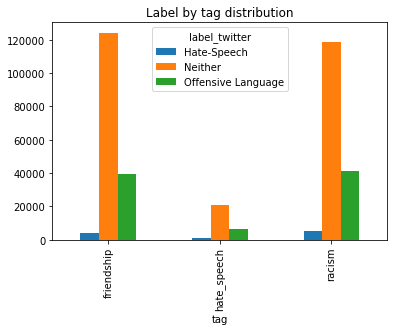

In [34]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_twitter')

<AxesSubplot:title={'center':'Label by tag distribution (Percentage)'}, xlabel='tag'>

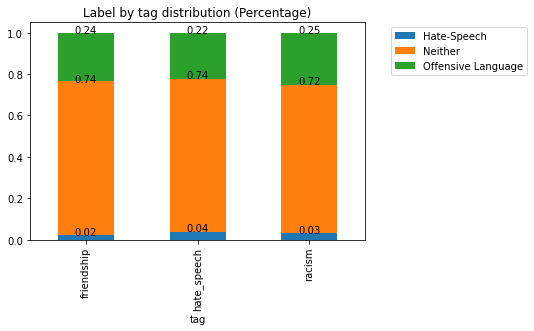

In [35]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_twitter')

In [37]:
hatespeech_sentences = df_results[df_results.label_twitter=='Hate-Speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

It strengthens my suspicion that each one of you is a murder suspect.
---
 I mean all of you had a motive to kill Mona.
---
Yes you are part of this.
---
I think you had a reason and opportunity to kill Mona as well.
---
Go back to where you belong, okay?
---
 We've been over all this before, George, but without a body we can't press charges against your soninlaw or anyone else.
---
And that's how you handle irate relatives.
---
 It's clear.
---
You thought you would plunder Mr. Woods' entire estate.
---
 The old man overheard the rumors about you abusing Mona.
---
That's all I can tell from a quick glance.
---
I've seen many cases like yours.
---
 Nadia saw you murder Mona.
---
Open this door!
---
 I may be too old to remember a poem, but I'm young enough to remember who tried to murder me.
---
 You don't think he's Mona's Casper, do you?
---
 It's none of your business.
---
The sooner everyone knows he killed Mona, the sooner he goes to jail.
---
They're on their way.
---
You deserve

## Intersections

### both are "hate speech"

In [38]:
df_intersections = df_results[(df_results.label_twitter=='Hate-Speech')&(df_results.label_fox_news=='Hate-Speech')]

In [39]:
df_intersections

,index,utterance,movie_name,tag,count_utterances,label_fox_news,label_twitter
946,946,That's all I can tell from a quick glance.,1917,friendship,1480,Hate-Speech,Hate-Speech
1490,10,"... was to see a filthy, dirty old drunkie...",A Clockwork Orange,friendship,1730,Hate-Speech,Hate-Speech
1721,241,He have arrived!,A Clockwork Orange,friendship,1730,Hate-Speech,Hate-Speech
1730,250,So around we come to your abode.,A Clockwork Orange,friendship,1730,Hate-Speech,Hate-Speech
1805,325,"You're a big, strong chelloveck, like us all.",A Clockwork Orange,friendship,1730,Hate-Speech,Hate-Speech
...,...,...,...,...,...,...,...
360256,125,SPIT IN THEIR EYE.,X-Men,racism,948,Hate-Speech,Hate-Speech
360518,387,"NO MATTER HOW LONG THEY LIVE WITH WHITE FOLKS,...",X-Men,racism,948,Hate-Speech,Hate-Speech
360760,629,HE ENDED UP BEING AN IMITATION WHITE MAN.,X-Men,racism,948,Hate-Speech,Hate-Speech
360941,810,THE WHITE MEN NEVER LEARN.,X-Men,racism,948,Hate-Speech,Hate-Speech


### fox news is "hate speech" and twitter is "offensive language"

In [40]:
df_intersections = df_results[(df_results.label_twitter=='Offensive Language')&(df_results.label_fox_news=='Hate-Speech')]

In [41]:
df_intersections

,index,utterance,movie_name,tag,count_utterances,label_fox_news,label_twitter
48,48,That's me.,1917,friendship,1480,Hate-Speech,Offensive Language
72,72,Just found this baby stashed in here. That wo...,1917,friendship,1480,Hate-Speech,Offensive Language
109,109,I was completely drunk.,1917,friendship,1480,Hate-Speech,Offensive Language
136,136,I got diddly squat when I worked for the old man.,1917,friendship,1480,Hate-Speech,Offensive Language
169,169,We're all blood.,1917,friendship,1480,Hate-Speech,Offensive Language
...,...,...,...,...,...,...,...
360862,731,I WONDERED WHAT THE LITTLE RICH LADY WOULD LOO...,X-Men,racism,948,Hate-Speech,Offensive Language
360980,849,THE MAN HAD RAPED HER.,X-Men,racism,948,Hate-Speech,Offensive Language
360984,853,HE KILLED HER THERE WITH HIS HANDS.,X-Men,racism,948,Hate-Speech,Offensive Language
361014,883,GET UP THERE.,X-Men,racism,948,Hate-Speech,Offensive Language
